<a href="https://colab.research.google.com/github/mcurry572/4540/blob/main/Michael_Curry_Maximum_Likelihood_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a target="_blank" href="https://colab.research.google.com/github/cyneuro/Neural-Networks-Machine-Learning/blob/main/stats/Maximum_Likelihood_Estimation.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Maximum Likelihood Estimation

This notebook assumes the data is a standard continuous normal distribution. The number of random samples, mean, and standard deviation of the distribution can be set in lines 7-9 in code cell 1.

The function `gaussian` calculates the negative log likelihood given the random samples and the initial predicted mean and standard deviations defined in initParams.

The key to the whole program is the scipy function `minimize`. It is a regular optimization function and more information about it can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

**Note:** the method can be a lot of different options, all different mathematical optimization techniques.


#### Questions:
1. If everything is working, we would expect more accurate $\mu^*$ and $\sigma^*$ predictions with more random samples. Think about why this is.
  - Just as you see when you flip a coin 10 times compared to 1000's of times you see the true values once there is more data presented. There is even the law of large numbers which supports this. The chance of error goes down with more data.
2. What happens when the initial parameter guesses are extremely off? What about when they're extremely close? How does this impact the number of samples?
  - If your guesses are far off, your optimization function will take more iterations to come true. In contrast, if you guesses are close your optimization function will converge much quicker. The more samples you have the lower variance you should have. You will find a more true value when you have more samples.
3. Break down each line in the `gaussian` function. Knowing what you know about MLE, what do you think the function `stats.norm.logpdf` does?
  - nll = -np.sum(stats.norm.logpdf(sample_data, loc=mean, scale=sd)) - this line is looking at the negative log liklihood based on the mean and standard deviation. once this runs, the results minimizes the negative log liklihood. This is equivalent to finding the maximum. Afterwards the maximized results are printed out.

In [4]:
from scipy import stats
import numpy as np
from scipy.optimize import minimize
np.random.seed(1)


samples = 100
mu      = 0
sigma   = 3


#  Take random sample from the distribution of data (normal dist in this case)
sample_data = np.random.normal(loc=mu, scale=sigma, size=samples)

def gaussian(params):
    mean = params[0]
    sd = params[1]

    # Ensuring that standard deviation is always positive
    if sd <= 0:
        return np.inf

    # Calculate negative log likelihood
    nll = -np.sum(stats.norm.logpdf(sample_data, loc=mean, scale=sd))

    return nll


# Initial guesses for mean and standard deviation
# I used the sample mean and the standard deviation for a better start
initParams = [np.mean(sample_data), np.std(sample_data, ddof=1)]

results = minimize(gaussian, initParams, method='Nelder-Mead')


print('mean*  = {:.3f} std*  = {:.3f}'.format(results.x[0],results.x[1]))
print('mean   = {:.3f} std   = {:.3f}'.format(mu, sigma))


mean*  = 0.182 std*  = 2.655
mean   = 0.000 std   = 3.000


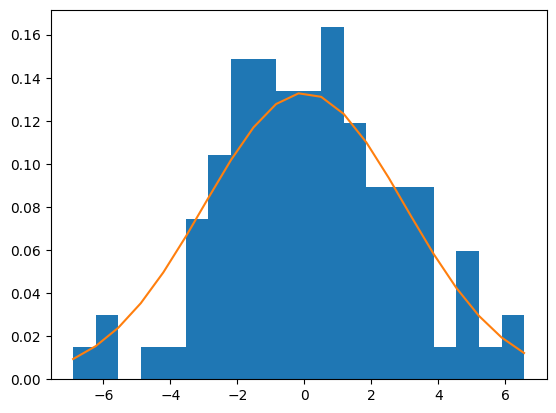

In [5]:
import matplotlib.pyplot as plt

def normal_dist(inp, mean, std):
    return 1./(np.sqrt(2.*np.pi)*std)*np.exp(-np.power((inp - mean)/std, 2.)/2)

x = np.arange(-10, 10, 0.1)
y = normal_dist(x, mu, sigma)

num_bins = 20

count, bins, ignored = plt.hist(sample_data, bins=num_bins, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ))
plt.show()